# [Goulib](../notebook.ipynb).expr

math expressions
(see [polynomials](polynomials.ipynb) for more)

In [1]:
from Goulib.notebook import *
from Goulib.expr import *
from math import pi,sin,sqrt

Expr can be created from:
* numbers
* text (python-like formula)

Expr has LaTeX representation in notebooks

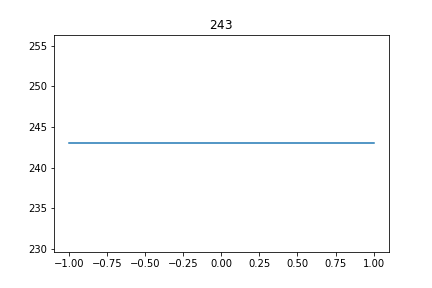

In [21]:
Expr(3**5) # is evaluated before Expr is created

In [20]:
e=Expr(3)**Expr(5) # combine Expr essions
h('as LaTeX (default) :',e)
print('as math formula :',e)
print('as python code :',repr(e))
print('evaluated :',e())


as math formula : 3^5
as python code : 3**5
evaluated : 243


In [4]:
e=Expr('5**3+(-3^2)') # ^ and ** are both considered as power operator for clarity+compatibility
h('as LaTeX (default) :',e)
print('as math formula :',e)
print('as python code :',repr(e))
print('evaluated :',e())

as math formula : 5^3+(-3^2)
as python code : 5**3+(-3**2)
evaluated : 116


In [5]:
e=Expr(sqrt)(Expr(pi))+Expr(1/5)
h('as LaTeX (default) :',e)
print('as math formula :',e)
print('as python code :',repr(e))
print('evaluated :',e())

as math formula : sqrt(pi)+1/5
as python code : sqrt(pi)+1/5
evaluated : 1.9724538509055158


Expr can also handle variables

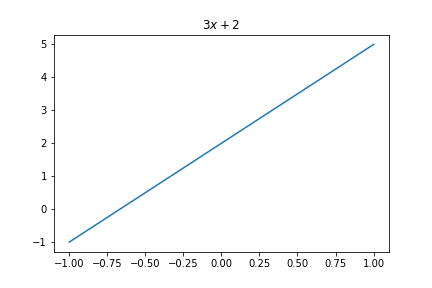

In [6]:
e1=Expr('3*x+2') #a very simple expression defined from text
e1

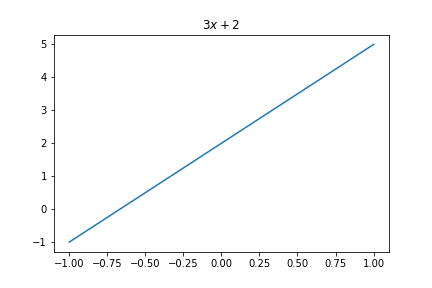

In [7]:
e1=Expr(lambda x:3*x+2) #the same expression defined from a lambda function
e1

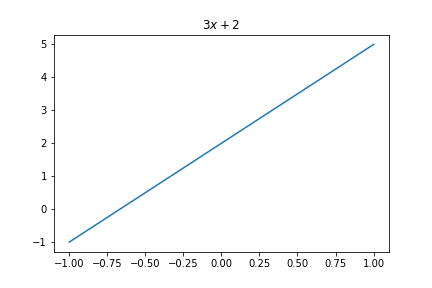

In [8]:
def f(x):
    return 3*x+2
Expr(f) #the same expression defined from a regular (simple...) function

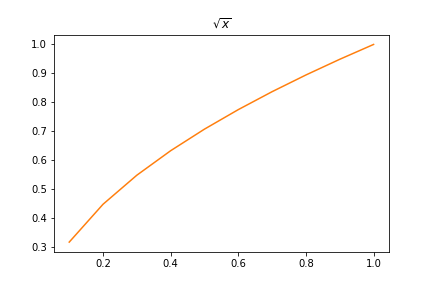

In [9]:
e2=Expr(sqrt) # predefined functions also work !
e2

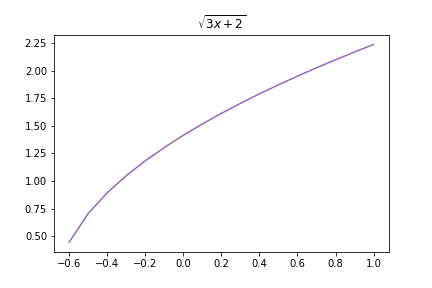

In [10]:
e3=e2(e1) #Expr can be composed
e3

In [11]:
print(e3(x=1)) # Expr can be evaluated as a function
print(e3((pi-4)/6)) #the x variable is implicit

2.23606797749979
1.2533141373155001


In [12]:
e1([-2,1,0,1,2]) # Expr can be evaluated at different x values at once

[-4, 5, 2, 5, 8]

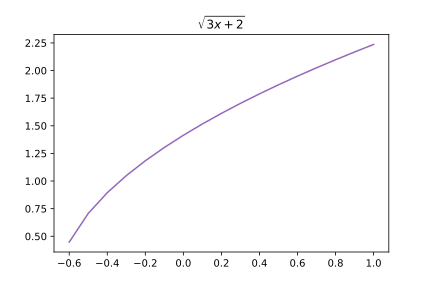

In [13]:
e3.plot()  # Expr can be also plotted. Note the X axis is automatically restricted to the definition domain

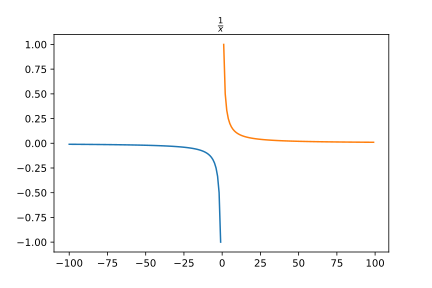

In [14]:
Expr('1/x').plot(x=range(-100,100)) #TODO: make a hole at 0

## multivariable

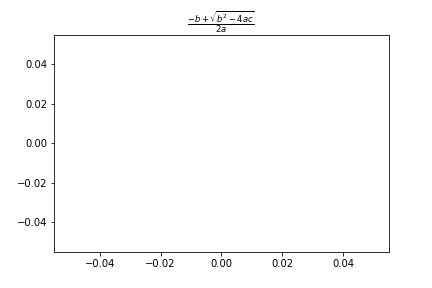

In [15]:
e=Expr('(-b+sqrt(b^2-4*a*c))/(2*a)') #laTex is rendered with some simple simplifications
e

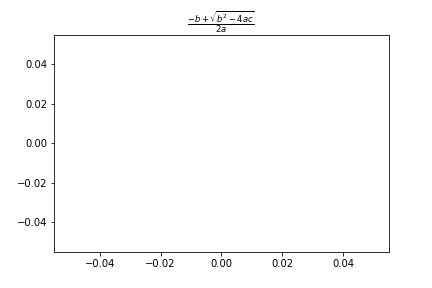

In [17]:
e(a=1) # substitution doesn't work yet ...